# **Use regularization to predict salaries for a baseball player**

## 1. Data preprocessing (understanding of my data)
## 2. Linear Regression analysis
## 3. Ridge Regression and the Lasso
## 4. Summary - the output of the regularized models (specifically, explain those variables that have been shrunk and why)




Author: Mia (Yuhsin Hou)

## Import necessary packages

In [0]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from scipy import stats
from pylab import rcParams
from matplotlib.pyplot import MultipleLocator

rcParams['figure.figsize'] = (20, 8)
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

from patsy import dmatrices
from sklearn import metrics

from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets
from sklearn import linear_model

# **Part 1 - Data preprocessing (understanding of my data)**

## Load data

In [178]:
# Read data from Google Sheet
data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS8oNn-6kZM5CJH78Dn-z0spO1tdhn-JntRMUh13rMfn0Liv6ypK3iuGhxtf-ZPiFSwGVlSPJCcgiI2/pub?gid=476472748&single=true&output=csv"
ball_df = pd.read_csv(data_path)
ball_df.head(3)

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,League,Division,PutOuts,Assists,Errors,NewLeague
0,875000,457,101,14,42,63,22,17,6521,1767,281,1003,977,619,A,W,389,39,4,A
1,1300000,441,118,28,84,86,68,8,2723,750,126,433,420,309,A,E,190,2,2,A
2,940000,593,152,23,69,75,53,6,2765,686,133,369,384,321,A,W,315,10,6,A


In [179]:
list(ball_df)

['Salary',
 'count_at_bats',
 'count_hits',
 'count_home_runs',
 'count_runs',
 'RBI',
 'count_walks',
 'years_experience',
 'cumulative_at_bats',
 'cumulative_hits',
 'cumulative_home_runs',
 'cumulative_runs',
 'cumulative_RBI',
 'cumulative_walks',
 'League',
 'Division',
 'PutOuts',
 'Assists',
 'Errors',
 'NewLeague']

## The type of the columns can be found out as follows:

In [180]:
ball_df.dtypes

Salary                   int64
count_at_bats            int64
count_hits               int64
count_home_runs          int64
count_runs               int64
RBI                      int64
count_walks              int64
years_experience         int64
cumulative_at_bats       int64
cumulative_hits          int64
cumulative_home_runs     int64
cumulative_runs          int64
cumulative_RBI           int64
cumulative_walks         int64
League                  object
Division                object
PutOuts                  int64
Assists                  int64
Errors                   int64
NewLeague               object
dtype: object

## Visualize overview variables correlation 

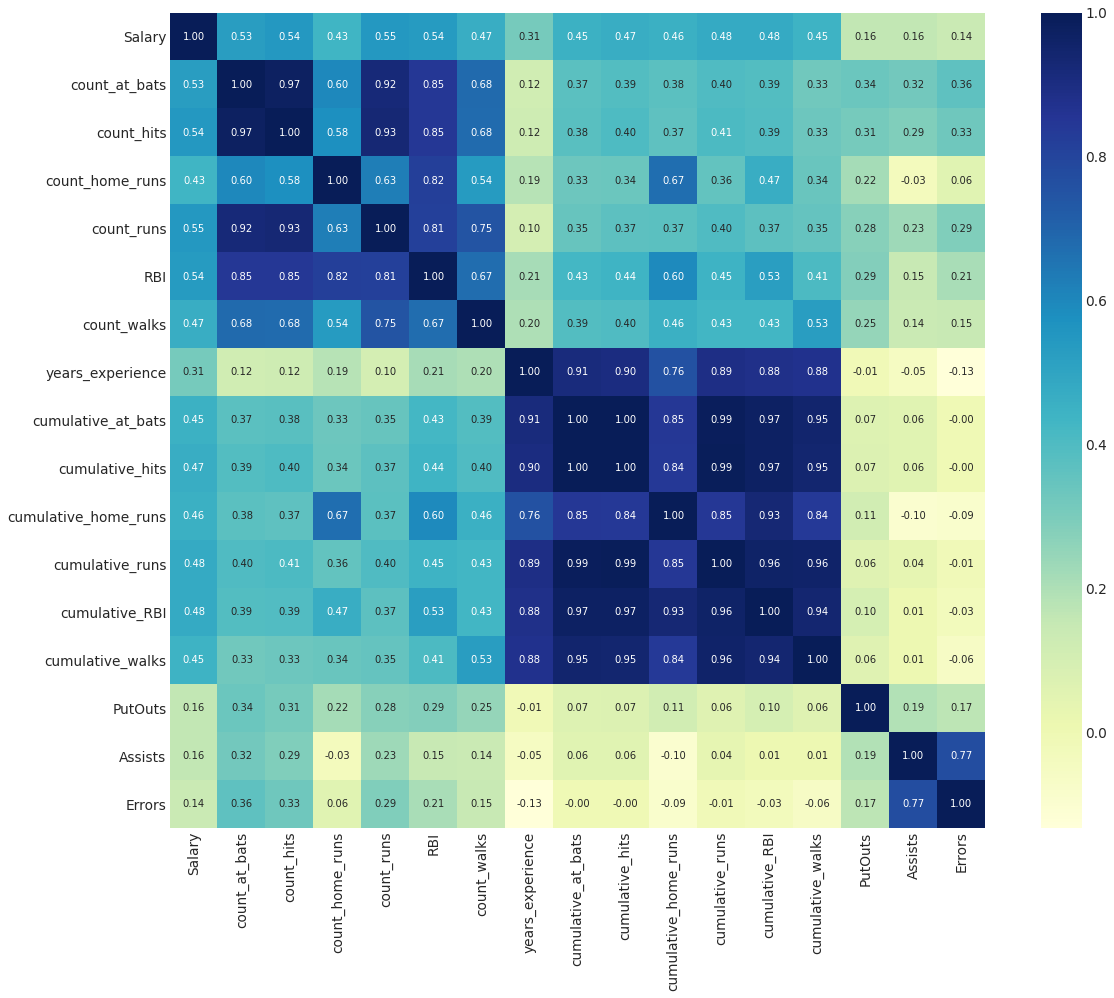

In [181]:
# Compute correlation matrix. 
corrmatrix = ball_df.corr('spearman')

# Reset size.
plt.rcParams['figure.figsize'] = (20, 15)

# Plot a heatmap. 
hm = sns.heatmap(corrmatrix, square = True, annot = True, cmap = 'YlGnBu', fmt = '.2f', annot_kws = {'size':10})
sns.set(font_scale = 1.25)

From above heatmap, I found some certain preditor variables have a strong correlation with other preditor variables, which means the multicollinearity. 

We can focus on the dark blue square areas in above heatmap, years experience and the grouped of cumulative variables (cumulative_runs, home runs, walks, RBI, hits, at bates.)

Multicollinearity is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

However, let's run a Linear Regression model, to see the model performance firstly. 

# **Part 2 - Linear Regression analysis**

In [0]:
# Convert categorical variables to dummy variables

cat_vars = ['League', 'Division', 'NewLeague']
for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(ball_df[var], prefix = var)
    ball_df = ball_df.join(cat_list)

In [183]:
# Drop columns for which we created dummy variables.

ball_df.drop(['League', 'Division', 'NewLeague'], axis=1, inplace=True)
ball_df.columns.values
print(ball_df.size)

# Drop outliers of salary = 0
ball_df = ball_df[ball_df.Salary != 0]
print(ball_df.size)

5589
4232


In [184]:
# Set y

y = ball_df.Salary
            

# Set X and drop the column with the independent variable (Salary)
X = ball_df.drop(['Salary'], axis = 1).astype('float64')

X

,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,PutOuts,Assists,Errors,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,457.0,101.0,14.0,42.0,63.0,22.0,17.0,6521.0,1767.0,281.0,1003.0,977.0,619.0,389.0,39.0,4.0,1.0,0.0,0.0,1.0,1.0,0.0
1,441.0,118.0,28.0,84.0,86.0,68.0,8.0,2723.0,750.0,126.0,433.0,420.0,309.0,190.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0
2,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,1.0,0.0,0.0,1.0,1.0,0.0
3,312.0,68.0,2.0,32.0,22.0,24.0,1.0,312.0,68.0,2.0,32.0,22.0,24.0,86.0,150.0,15.0,1.0,0.0,1.0,0.0,1.0,0.0
4,526.0,146.0,13.0,71.0,70.0,84.0,6.0,2648.0,715.0,77.0,352.0,342.0,289.0,303.0,9.0,9.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,574.0,159.0,21.0,107.0,75.0,59.0,10.0,4631.0,1300.0,90.0,702.0,504.0,488.0,238.0,445.0,22.0,1.0,0.0,1.0,0.0,1.0,0.0
180,257.0,66.0,5.0,31.0,26.0,32.0,14.0,3910.0,979.0,33.0,518.0,324.0,382.0,87.0,166.0,14.0,0.0,1.0,0.0,1.0,1.0,0.0
181,204.0,49.0,6.0,23.0,25.0,12.0,7.0,1309.0,308.0,27.0,126.0,132.0,66.0,419.0,46.0,5.0,1.0,0.0,0.0,1.0,1.0,0.0
182,283.0,77.0,14.0,45.0,47.0,26.0,16.0,6840.0,1910.0,259.0,915.0,1067.0,546.0,144.0,6.0,5.0,1.0,0.0,0.0,1.0,1.0,0.0


In [185]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =0)

# Create the linear regression object and train/fit models.
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Create the linear regression object and train/fit models.
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions using the training set.
listing_y_pred_train = lr_model.predict(X_train)

## Check the accuracy rate (R^2) on training dataset

In [187]:
# Make predictions using the training set.
listing_y_pred_train = lr_model.predict(X_train)

# Explained variance score:
print('The coefficient of determination (R^2):  %.2f' % r2_score(y_train, listing_y_pred_train))

The coefficient of determination (R^2):  0.61


## Check the accuracy rate (R^2) on testing dataset

In [188]:
# Make predictions using the testing set.
listing_y_pred_test = lr_model.predict(X_test)

# Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):  %.2f" % mean_squared_error(y_test, listing_y_pred_test))

# Explained variance score:
print('The coefficient of determination (R^2):  %.2f' % r2_score(y_test, listing_y_pred_test))

Mean Squared Error (MSE):  67248971502.96
The coefficient of determination (R^2):  0.50


We can see that Linear Regression models the training data performs better than on the testing data, it is a phenomenon of overfitting. 

In addition, because

- The predictor variables are highly correlated with each other(multicollinearity).

- There are many predictors that reflected in the large MSE.

Thus, we have to reduce variance at the cost of introducing some bias, and avoid overfitting. 

I will introduce 2 regularization methods: Ridge Regression and Lasso in the following sections. 

# **Part 3 - Ridge Regression and the Lasso**

Generate an array of alpha values ranging from very big to very small, essentially covering the full range of scenarios from the null model containing only the intercept, to the least squares fit:

In [189]:
# Check the alpha from 10^10 to 10^(-10) with 100 samples. 

alphas = 10** np.linspace(10, -10, 100)
alphas

array([1.00000000e+10, 6.28029144e+09, 3.94420606e+09, 2.47707636e+09,
       1.55567614e+09, 9.77009957e+08, 6.13590727e+08, 3.85352859e+08,
       2.42012826e+08, 1.51991108e+08, 9.54548457e+07, 5.99484250e+07,
       3.76493581e+07, 2.36448941e+07, 1.48496826e+07, 9.32603347e+06,
       5.85702082e+06, 3.67837977e+06, 2.31012970e+06, 1.45082878e+06,
       9.11162756e+05, 5.72236766e+05, 3.59381366e+05, 2.25701972e+05,
       1.41747416e+05, 8.90215085e+04, 5.59081018e+04, 3.51119173e+04,
       2.20513074e+04, 1.38488637e+04, 8.69749003e+03, 5.46227722e+03,
       3.43046929e+03, 2.15443469e+03, 1.35304777e+03, 8.49753436e+02,
       5.33669923e+02, 3.35160265e+02, 2.10490414e+02, 1.32194115e+02,
       8.30217568e+01, 5.21400829e+01, 3.27454916e+01, 2.05651231e+01,
       1.29154967e+01, 8.11130831e+00, 5.09413801e+00, 3.19926714e+00,
       2.00923300e+00, 1.26185688e+00, 7.92482898e-01, 4.97702356e-01,
       3.12571585e-01, 1.96304065e-01, 1.23284674e-01, 7.74263683e-02,
      

## **1. Ridge Regression**

The Ridge() function has an alpha argument that is used to tune the model.

Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function, which we have tried to add alpha in above code.

In [0]:
# When initualize the Ridge model, we have to standardize the variables to make sure they are in the same scale. 

ridge = Ridge(normalize = True)
coefs = []

# Associated with each alpha value is a vector of ridge regression coefficients, which we'll store in a list of coefs.
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

We expect the coefficient estimates to be much smaller, in terms of l2 norm, when a large value of alpha is used, as compared to when a small value of alpha is used. I want to plot and find out:

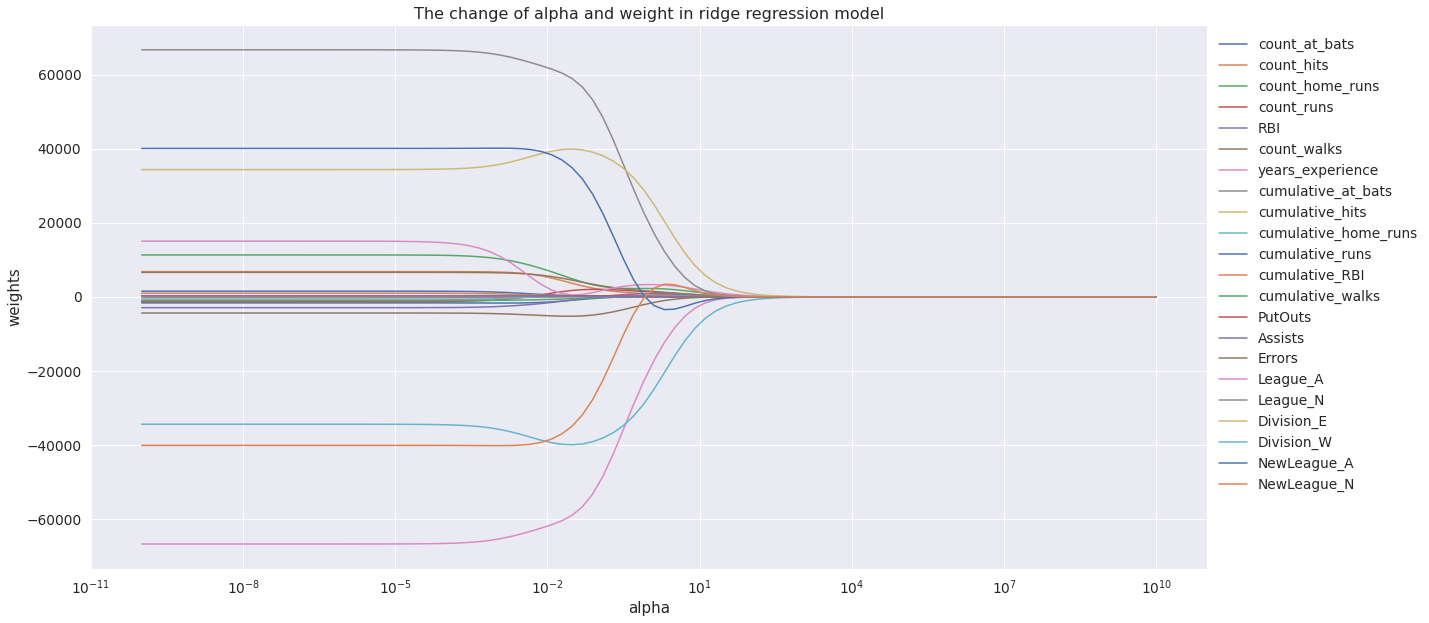

In [191]:
# Set size of figure. 
plt.figure(figsize=(20, 10))

# Make a plot 
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')

# Set title, axis, labels of plot. 
plt.title('The change of alpha and weight in ridge regression model', fontsize = 16)
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(X.columns, bbox_to_anchor = (1,1))

We can see the larger the alpha, the more variabes be shrinked.  

However, if alpha is very large then it will add too much weight and it will lead to underfitting. Having said that it’s important how alpha is chosen. This technique works very well to avoid overfitting issue.

In [0]:
# Check the alpha from 0.01 to 2 with 200 samples. 
r_alphas = np.linspace(0.01, 2, 200)

# Store each score (R^2) and MSE associated with each alpha. 
scores = []
mse = []
for a in r_alphas:
    ridge = Ridge(alpha = a, normalize = True)
    ridge.fit(X_train, y_train)
    scores.append(ridge.score(X_test, y_test))
    mse.append(mean_squared_error(y_test, ridge.predict(X_test)))

(0.5, 0.62)

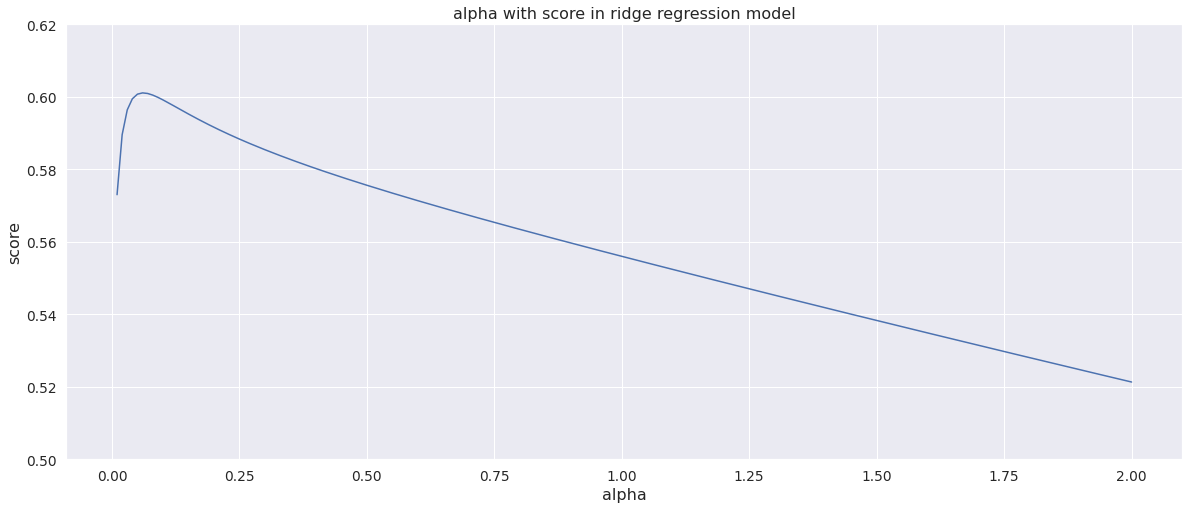

In [193]:
# Visualize above code.

plt.figure(figsize=(20, 8))
ax = plt.gca()
ax.plot(r_alphas, scores)

plt.xlabel('alpha', fontsize = 16)
plt.ylabel('score', fontsize = 16)

plt.title('alpha with score in ridge regression model', fontsize = 16)

plt.ylim(0.5, 0.62)

Above plot shows in Ridge model, the alpha between 0.25 to 0.5 can achieve the highest coefficient of determination (R^2).

Thus, I would like to try the alpha with 0.06, and evaluate its MSE on the test set

In [194]:
# Try out the alpha 0.06.

ridge1 = Ridge(alpha = 0.06, normalize = True)
ridge1.fit(X_train, y_train)

# Print score & MSE.
print('The coefficient of determination (R^2): ', ridge1.score(X_test, y_test))
print('MSE: ', mean_squared_error(y_test, ridge1.predict(X_test)))

The coefficient of determination (R^2):  0.6011069879094926
MSE:  53495740153.18176


In [195]:
# Fit the ridge model. 

ridge1.fit(X, y)

Ridge(alpha=0.06, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

## Rank the welght value to see the importance (influence) of each feature (by absolute value)

In [196]:
# Print the weight of each feature. 

coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Features']
coeff_df['Coefficient'] = pd.Series(ridge1.coef_)

coeff_df.sort_values(by = 'Coefficient', ascending = False)

coeff_df.iloc[coeff_df['Coefficient'].abs().argsort()[::-1]].round(4)

,Features,Coefficient
17,League_N,55311.9797
16,League_A,-55311.9797
18,Division_E,39492.4227
19,Division_W,-39492.4227
20,NewLeague_A,30167.0266
21,NewLeague_N,-30167.0266
15,Errors,-5056.0706
5,count_walks,3717.6050
2,count_home_runs,3676.8905
1,count_hits,2685.3585


## **2. Lasso Regression**

I saw that ridge regression with a wise choice of alpha can outperform least squares on the data set. 

Now, I want to see whether the lasso can yield either a more accurate or a more interpretable model than ridge regression. 

Note Lasso here adds “absolute value of magnitude” of coefficient as penalty term to the loss function.

Text(0.5, 1.0, 'The change of alpha and weight in lasso regression model')

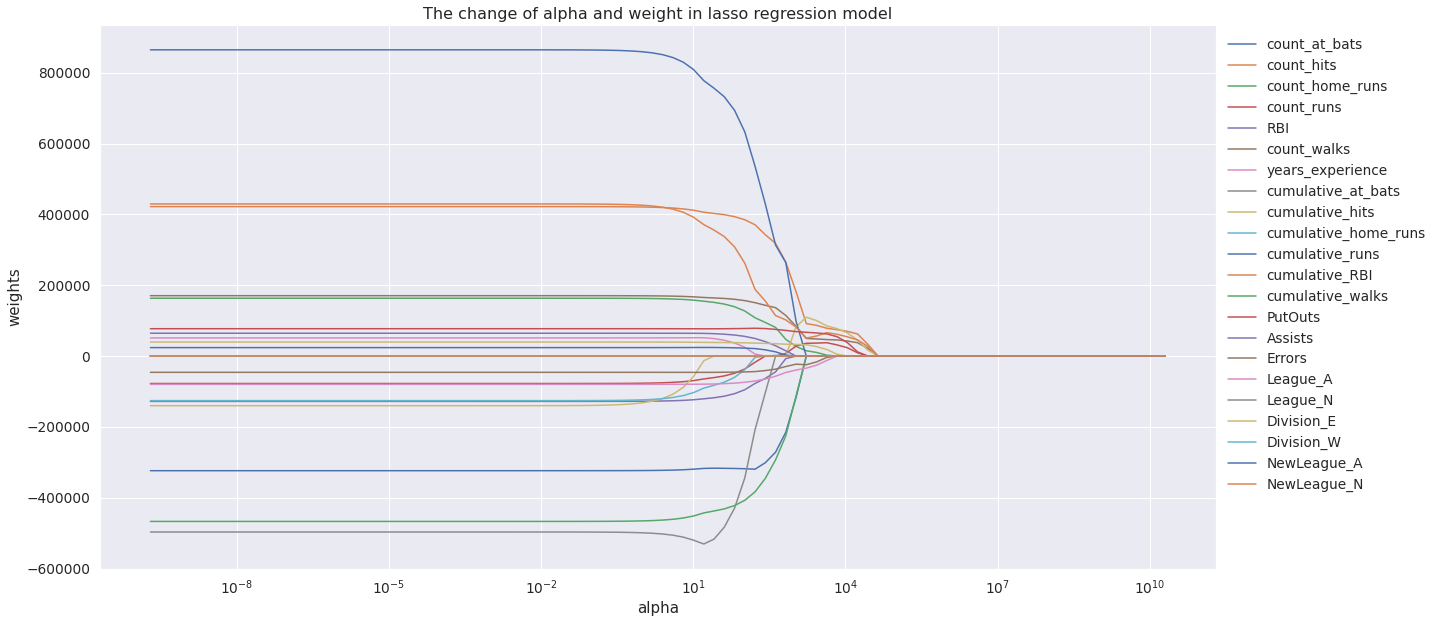

In [197]:
# In order to fit a lasso model, we'll use the Lasso() function, but this time include the argument max_iter = 1000000. 

lasso = Lasso(max_iter = 100000, normalize = True)
coefs = []

# Store each score (R^2) and MSE associated with each alpha. 
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)


# Visualize above code. 
plt.figure(figsize=(20, 10))

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(X.columns)

plt.legend(X.columns, bbox_to_anchor = (1,1))

plt.title('The change of alpha and weight in lasso regression model', fontsize = 16)

Here, we can see that similar as ridge regression, the larger the alpha, the more variabes be shrinked. 

In [0]:
# Check the alpha from 10 to 3000 with 200 samples. 

l_alphas = np.linspace(10, 3000, 200)

# Store each score (R^2) and MSE associated with each alpha when running Lasso model. 
scores = []
mse = []
for a in l_alphas:
    lasso = Lasso(alpha = a, normalize = True, max_iter = 10000, random_state = 1)
    lasso.fit(X_train, y_train)
    scores.append(lasso.score(X_test, y_test))
    mse.append(mean_squared_error(y_test, lasso.predict(X_test)))

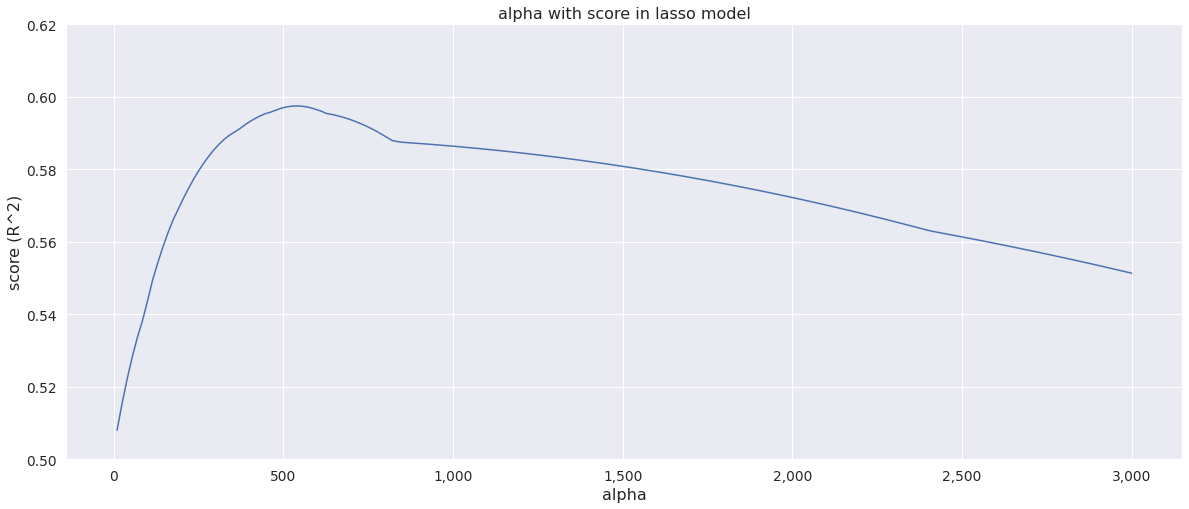

In [199]:
# Visualize above code.

plt.figure(figsize=(20, 8))

ax = plt.gca()
ax.plot(l_alphas, scores)

plt.xlabel('alpha', fontsize = 16)
plt.ylabel('score (R^2)', fontsize = 16)

plt.title('alpha with score in lasso model', fontsize = 16)

plt.ylim(0.5, 0.62)

# Set x ticks. 
fmt = '{x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)



Above plot shows alpha between 500 to 1,000 can achieve the highest coefficient of determination (R^2).

In [0]:
# Try the alpha with 510 in Lasso. 

lasso_model = Lasso(alpha = 510, normalize = True)
lasso_model.fit(X_train, y_train.values.ravel())
pred = lasso_model.predict(X_test)

## Rank the welght value to see the importance (influence) of each feature (by absolute value)

In [201]:
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Features']
coeff_df['Coefficient'] = pd.Series(lasso_model.coef_)

coeff_df.sort_values(by = 'Coefficient', ascending = False)

coeff_df.iloc[coeff_df['Coefficient'].abs().argsort()[::-1]].round(4)

,Features,Coefficient
16,League_A,-80704.7497
18,Division_E,65936.3944
1,count_hits,4360.3207
5,count_walks,4091.5690
15,Errors,-3469.1347
2,count_home_runs,3290.2583
3,count_runs,1015.4682
0,count_at_bats,-904.7013
12,cumulative_walks,-424.1913
10,cumulative_runs,351.0031


We can see out of 21 features in this dataset, only 13 features are used (non zero value of the coefficient weight).


In [202]:
# Print score and MSE. 
print('The coefficient of determination (R^2): ', lasso_model.score(X_test, y_test))
print('Mean square error (MSE): ', mean_squared_error(y_test, lasso_model.predict(X_test)))

The coefficient of determination (R^2):  0.5972334329544873
Mean square error (MSE):  54015224533.85829


# **Summary** 

## Q1. Clearly explain the output of the regularized models (specifically, those variables that have been shrunk and why)

We can see below 9 variables regression coefficients have been shrunk to zero in Lasso model. 

That is because the weight (coefficient) of those variables have non correlation with our prediction (salary). 

In other words, we can say Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. 

So, this works well for feature (variable) selection in case we have a huge number of features.

- League_N

- NewLeague_A

- cumulative_home_runs

- cumulative_at_bats

- years_experience

- RBI

- Assists

- Division_W

- NewLeague_N


The specific reasons are below, to make it more clear, please refer the photo I inserted by clicking below URL:    

[Figure - Why LASSO can reduce dimension of feature space? Example on 2D feature space. Modified from the plot used in "The Elements of Statistical Learning"](https://drive.google.com/open?id=1uxBN5enfYtG4lfO5k_68O_B-n8jhIL0X)


For a 2 dimensional feature space, the diagram with the diamond and cyan colour is Lasso. The diagram with the circle and green colour is Ridge regression.
And the elliptical contours around β ̂ are the cost function of linear regression (Residual Sum of Squares - RSS). 

As the ellipse expands, the corresponding RSS increases. 
The estimated value of lasso and ridge is the first point of contact with the restricted area during the continuous expansion of the ellipse under a certain restricted area. 

Thus, if there is a certain parameter estimated to be zero, then where should this contact point be? It must be on a certain axis. The diamond (Lasso) has corners on the axes, thus whenever the elliptical region (RSS) hits such point, one of the features completely vanishes.

On the other side, since the restricted area of the Ridge is circular, the real contact point cannot fall on the coordinate axis, and may be infinitely close, but it can never be reached. This is the mathematical interpretation that is not available. So Ridge cannot shrink the parameter to zero, but Lasso can.

## Q2. Difference between Ridge Regression and Lasso

The important difference between them is how they tackle the issue of multicollinearity between the features. 

- In Ridge Regression, the coefficients of correlated variables tend be similar, while in Lasso one of them is usually zeroed and the other is assigned the entire impact. Because of this, Ridge regression is expected to work better if there are many large parameters of about the same value, i.e. when most predictors truly impact the response. 

- Lasso, on the other hand, is expected to come on top when there are a small number of significant parameters and the others are close to zero (e.g., when only a few predictors actually influence the response.)


Reference: 

- A Comparison of Shrinkage and Selection Methods for Linear Regression

https://towardsdatascience.com/a-comparison-of-shrinkage-and-selection-methods-for-linear-regression-ee4dd3a71f16